IMDB Dataset successfully loaded!

First 5 rows of the dataset:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive



Distribution of sentiments:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

--- Sample Review ---
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xavie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xavie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text cleaning complete!

--- Before and After Cleaning ---


,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...


Preparing data for the model...
Text has been converted to numerical vectors.
Training the Logistic Regression model...
Model training complete!

--- Model Performance ---
Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



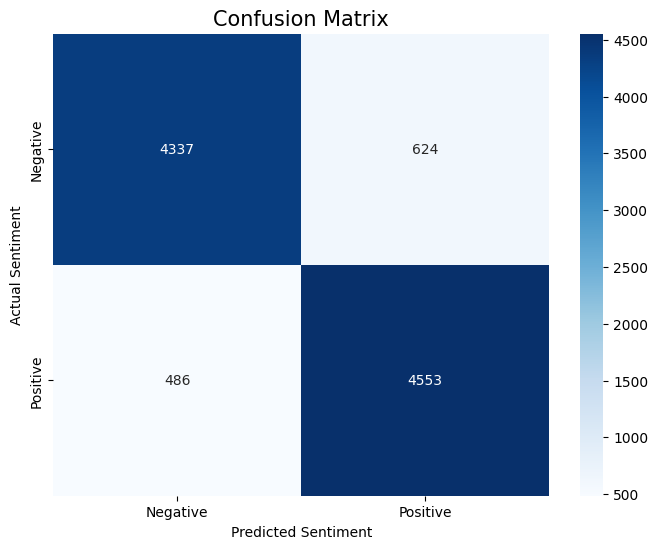


--- Test with New Sentences ---
Review: 'This movie was absolutely fantastic, one of the best I have ever seen!'
Predicted Sentiment: positive

Review: 'It was a complete waste of time, the plot was boring and the acting was terrible.'
Predicted Sentiment: negative



In [5]:
# 1: Load and Explore the IMDB Dataset

import pandas as pd

# Load the dataset from the CSV file
try:
    df = pd.read_csv('IMDB Dataset.csv')
    print("IMDB Dataset successfully loaded!")
except FileNotFoundError:
    print("File not found! Make sure 'IMDB Dataset.csv' is in your project folder.")

# --- Initial Exploration ---

# 1. Display the first 5 rows to understand the columns ('review' and 'sentiment')
print("\nFirst 5 rows of the dataset:")
display(df.head())

# 2. Check the balance of positive vs. negative reviews
print("\nDistribution of sentiments:")
print(df['sentiment'].value_counts())

# 3. Look at a full sample review to see what the raw text looks like
print("\n--- Sample Review ---")
print(df['review'][0])
print("---------------------")

# 2: Text Cleaning and Preparation

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the list of stop words and the wordnet dictionary for lemmatization
# This only needs to be run once.
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the tools
lemmatizer = WordNetLemmatizer()
english_stopwords = set(stopwords.words('english'))

# Create a function that will perform all the cleaning steps
def clean_text(text):
    # 1. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # 2. Remove punctuation and any non-letter characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # 3. Convert to lowercase
    text = text.lower()
    
    # 4. Split the text into a list of words
    words = text.split()
    
    # 5. Remove stop words and lemmatize the words
    # Lemmatization reduces words to their root form (e.g., 'running' -> 'run')
    words = [lemmatizer.lemmatize(word) for word in words if word not in english_stopwords]
    
    # 6. Join the words back into a clean sentence
    cleaned_text = ' '.join(words)
    
    return cleaned_text

# --- Apply the function to our 'review' column ---
print("Cleaning and preparing all 50,000 reviews... This may take a few minutes.")

# We create a new column 'cleaned_review' to hold the result
df['cleaned_review'] = df['review'].apply(clean_text)

print("Text cleaning complete!")

# --- Display a before-and-after comparison ---
print("\n--- Before and After Cleaning ---")
display(df[['review', 'cleaned_review']].head())

# 3: Vectorization, Model Training, and Evaluation

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Preparing data for the model...")

# --- Step 3.1: Define Features (X) and Target (y) ---
X = df['cleaned_review']
y = df['sentiment']

# --- Step 3.2: Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 3.3: Convert Text to Numbers (TF-IDF Vectorization) ---
# TF-IDF converts text into a matrix of numbers, giving more weight to important words.
vectorizer = TfidfVectorizer(max_features=5000) # We'll use the top 5000 most frequent words

# Fit the vectorizer on the training data and transform both training and testing data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Text has been converted to numerical vectors.")

# --- Step 3.4: Train the Classification Model ---
print("Training the Logistic Regression model...")
model = LogisticRegression()
model.fit(X_train_vec, y_train)
print("Model training complete!")

# --- Step 3.5: Evaluate the Model ---
print("\n--- Model Performance ---")
predictions = model.predict(X_test_vec)

# Print the classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, predictions))

# Visualize the performance with a confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix', fontsize=15)
plt.ylabel('Actual Sentiment')
plt.xlabel('Predicted Sentiment')
plt.show()

# --- Step 3.6: Test with Your Own Reviews! ---
print("\n--- Test with New Sentences ---")

# We combine the vectorizer and model into a single pipeline for easy use
from sklearn.pipeline import make_pipeline
final_model = make_pipeline(vectorizer, model)

# Example reviews
review1 = "This movie was absolutely fantastic, one of the best I have ever seen!"
review2 = "It was a complete waste of time, the plot was boring and the acting was terrible."

# Predict the sentiment of the example reviews
print(f"Review: '{review1}'\nPredicted Sentiment: {final_model.predict([review1])[0]}\n")
print(f"Review: '{review2}'\nPredicted Sentiment: {final_model.predict([review2])[0]}\n")